In [9]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
# Import and read the data
file = os.path.join("Resources", "beer_profile_and_ratings.csv")
df = pd.read_csv(file)

In [55]:
df.rename(columns = {"Style":"Beer_Style", "Beer Name (Full)":"Beer_Name_Full", "Min IBU":"Min_IBU", "Max IBU":"Max_IBU"}, inplace=True)

df = df.drop(["Name", "Description"], axis=1)

df

,Beer_Style,Brewery,Beer_Name_Full,ABV,Min_IBU,Max_IBU,Astringency,Body,Alcohol,Bitter,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,5.3,25,50,13,32,9,47,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,7.2,25,50,12,57,18,33,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,5.0,25,50,14,37,6,42,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,8.5,25,50,13,55,31,47,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,7.2,25,50,25,51,26,44,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,Winter Warmer,Cisco Brewers Inc.,Cisco Brewers Inc. Winter Shredder,8.8,35,50,15,37,24,35,...,23,45,67,74,4.125000,3.875000,3.875000,3.750000,4.000000,4
3193,Winter Warmer,RJ Rockers Brewing Company,RJ Rockers Brewing Company First Snow Ale,6.0,35,50,15,31,23,16,...,54,14,140,58,3.950000,3.750000,3.760000,3.790000,3.730000,50
3194,Winter Warmer,Natty Greene's Pub & Brewing Co.,Natty Greene's Pub & Brewing Co. Red Nose Wint...,6.8,35,50,8,44,24,19,...,26,21,96,77,3.576923,3.711538,3.596154,3.673077,3.711538,26
3195,Winter Warmer,Fish Brewing Company / Fishbowl Brewpub,Fish Brewing Company / Fishbowl Brewpub Fish T...,7.5,35,50,11,36,50,70,...,81,110,18,73,3.902299,3.885057,3.862069,3.902299,3.879310,87


In [33]:
# Find out how many unique breweries there are
len(df["Brewery"].unique())


934

In [ ]:
# Viz 1 -- No. breweries compared to no. beers on list



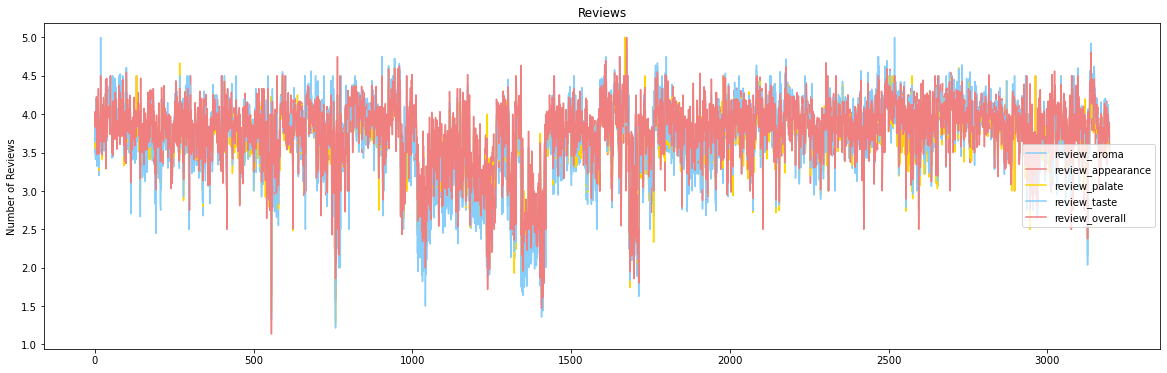

In [41]:
# Viz 2 -- Reviews on multiple line graph vs average
review_df = df[["review_aroma", "review_appearance", "review_palate", "review_taste", "review_overall"]]

review_df.plot(title ="Reviews", ylabel ="Number of Reviews",
                     color =["lightskyblue", "lightcoral","gold"], xlabel ="", figsize =(20,6))

plt.legend(loc ='right')

# # Import the style from Matplotlib.
# from matplotlib import style
# # Use the graph style fivethirtyeight.
# style.use('fivethirtyeight')

# plt.savefig("analysis/PyBer_fare_summary.png")

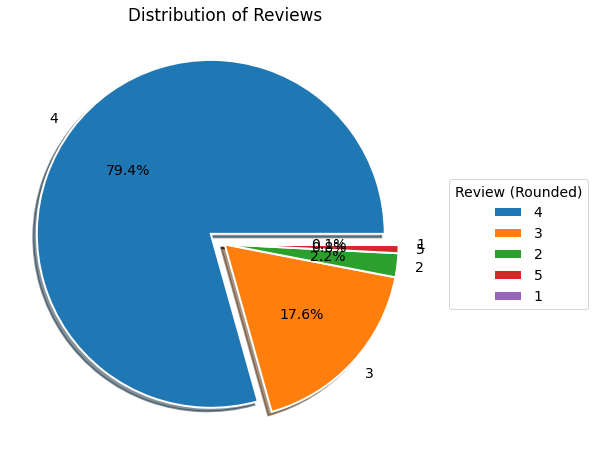

In [120]:
# Viz 3 -- Review distribution
import matplotlib as mpl
rounded_reviews = df["review_overall"].round(0)
rounded_reviews = rounded_reviews.sort_values(ascending=False)

data = rounded_reviews.value_counts()
scores = ["4", "3", "2", "5", "1"]
wp = { 'linewidth' : 2, 'edgecolor' : "white" }

fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts, autotexts = ax.pie(data, 
    labels = scores,
    explode = [0.1, 0, 0, 0, 0],
    autopct='%1.1f%%',
    wedgeprops = wp,
    shadow=True
    )

ax.legend(wedges, scores,
          title ="Review (Rounded)",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
    
plt.title("Distribution of Reviews")
mpl.rcParams['font.size'] = 14

plt.show()

In [114]:
rounded_reviews.value_counts()

4.0    2537
3.0     563
2.0      71
5.0      24
1.0       2
Name: review_overall, dtype: int64

In [117]:
rounded_reviews = rounded_reviews.sort_values(ascending=False)
rounded_reviews

99      5.0
1675    5.0
1653    5.0
1342    5.0
1609    5.0
       ... 
1390    2.0
1316    2.0
1346    2.0
1407    1.0
556     1.0
Name: review_overall, Length: 3197, dtype: float64